In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('/content/drive/MyDrive/Portofolio/StockPricePredictionUsingLSTM/ANTM.JK.csv')

In [32]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-16,2160.0,2200.0,2150.0,2180.0,2093.774414,92259000
1,2023-01-17,2200.0,2290.0,2180.0,2270.0,2180.214600,242582700
2,2023-01-18,2260.0,2270.0,2210.0,2260.0,2170.610107,122109900
3,2023-01-19,2290.0,2320.0,2270.0,2270.0,2180.214600,132011300
4,2023-01-20,2300.0,2340.0,2280.0,2320.0,2228.236816,113403800


In [33]:
data['Date']=pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-16,2160.0,2200.0,2150.0,2180.0,2093.774414,92259000
2023-01-17,2200.0,2290.0,2180.0,2270.0,2180.214600,242582700
2023-01-18,2260.0,2270.0,2210.0,2260.0,2170.610107,122109900
2023-01-19,2290.0,2320.0,2270.0,2270.0,2180.214600,132011300
2023-01-20,2300.0,2340.0,2280.0,2320.0,2228.236816,113403800


In [34]:
data =data[['Adj Close','Close']]
data.head()

,Adj Close,Close
Date,,
2023-01-16,2093.774414,2180.0
2023-01-17,2180.214600,2270.0
2023-01-18,2170.610107,2260.0
2023-01-19,2180.214600,2270.0
2023-01-20,2228.236816,2320.0


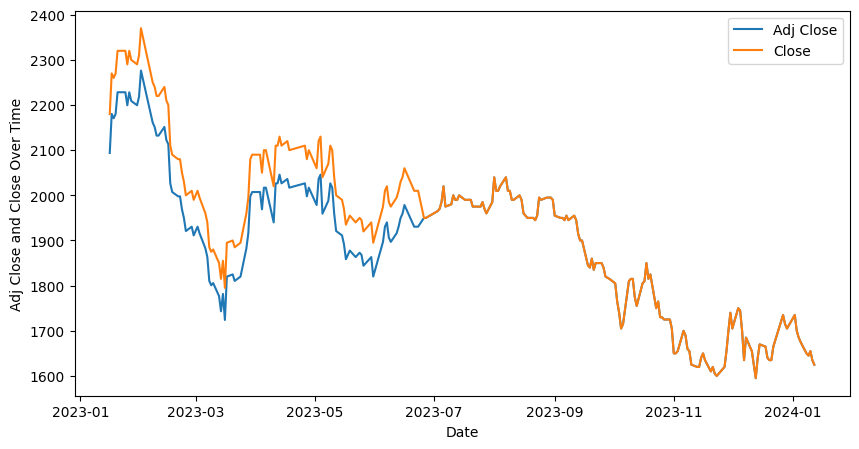

In [35]:
plt.figure(figsize=[10,5])
plt.plot(data.index,data['Adj Close'],label='Adj Close')
plt.plot(data.index,data['Close'],label='Close')
plt.xlabel('Date')
plt.ylabel('Adj Close and Close Over Time')
plt.legend()
plt.show()

In [36]:
data.isnull().sum()

Adj Close    0
Close        0
dtype: int64

In [37]:
data = data[['Adj Close']]
data.head()

,Adj Close
Date,
2023-01-16,2093.774414
2023-01-17,2180.214600
2023-01-18,2170.610107
2023-01-19,2180.214600
2023-01-20,2228.236816


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [39]:
from sklearn.model_selection import train_test_split
train_size = int(len(data_scaled)*0.8)
train_data, test_data = data_scaled[:train_size],data_scaled[train_size:]

In [40]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)

In [13]:
# train_data = train_data.to_numpy()
# test_data = test_data.to_numpy()

In [42]:
sequence_length = 10
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)


In [45]:
print(x_train)

[[0.73213596 0.85901891 0.84492076 ... 0.92950927 0.90131334 0.8872152 ]
 [0.85901891 0.84492076 0.85901891 ... 0.90131334 0.8872152  0.91541149]
 [0.84492076 0.85901891 0.92950927 ... 0.8872152  0.91541149 1.        ]
 ...
 [0.31559203 0.37430683 0.32293138 ... 0.19816244 0.19082309 0.19082309]
 [0.37430683 0.32293138 0.33761008 ... 0.19082309 0.19082309 0.16146569]
 [0.32293138 0.33761008 0.22751984 ... 0.19082309 0.16146569 0.08073285]]


In [46]:
print(y_train)

[0.91541149 1.         0.97180371 0.94360742 0.85901891 0.83082262
 0.81672447 0.78852818 0.78852818 0.81672447 0.77443004 0.76033225
 0.63344912 0.60525283 0.59115469 0.59115469 0.54886043 0.52066414
 0.47836988 0.49246803 0.46427174 0.47836988 0.49246803 0.47132081
 0.42197748 0.39378119 0.31624157 0.30214343 0.3091925  0.26689824
 0.21755474 0.27394732 0.18935862 0.33033972 0.33738879 0.31624157
 0.33033972 0.42197748 0.47132081 0.59115469 0.60525283 0.60525283
 0.60525283 0.54886043 0.61935098 0.61935098 0.50656617 0.63344912
 0.63344912 0.66164523 0.63344912 0.64754727 0.61935098 0.63344912
 0.59115469 0.61935098 0.56295858 0.64754727 0.66164523 0.53476229
 0.57705672 0.63344912 0.61935098 0.53476229 0.47836988 0.46427174
 0.43607545 0.38673212 0.41492841 0.39378119 0.40083026 0.40787934
 0.40083026 0.3655849  0.38673212 0.39378119 0.33033972 0.44312452
 0.49246803 0.50656617 0.45722267 0.44312452 0.47132081 0.49246803
 0.52066414 0.53476229 0.56295858 0.52066414 0.50656617 0.4924

In [48]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [58]:
model=Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=20,batch_size=64)

Epoch 1/20
3/3 [==============================] - 7s 33ms/step - loss: 0.2234
Epoch 2/20
3/3 [==============================] - 0s 32ms/step - loss: 0.0319
Epoch 3/20
3/3 [==============================] - 0s 32ms/step - loss: 0.0467
Epoch 4/20
3/3 [==============================] - 0s 35ms/step - loss: 0.0219
Epoch 5/20
3/3 [==============================] - 0s 33ms/step - loss: 0.0207
Epoch 6/20
3/3 [==============================] - 0s 33ms/step - loss: 0.0266
Epoch 7/20
3/3 [==============================] - 0s 32ms/step - loss: 0.0203
Epoch 8/20
3/3 [==============================] - 0s 34ms/step - loss: 0.0123
Epoch 9/20
3/3 [==============================] - 0s 42ms/step - loss: 0.0157
Epoch 10/20
3/3 [==============================] - 0s 33ms/step - loss: 0.0136
Epoch 11/20
3/3 [==============================] - 0s 32ms/step - loss: 0.0130
Epoch 12/20
3/3 [==============================] - 0s 32ms/step - loss: 0.0118
Epoch 13/20
3/3 [==============================] - 0s 32ms/st

In [59]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions.reshape(-1,1))

2/2 [==============================] - 2s 10ms/step


In [60]:
from sklearn.metrics import mean_squared_error as MSE

In [62]:
mse = MSE(data[-len(predictions):]['Adj Close'],predictions)
print(f"Mean Squared Eror :{mse}")

Mean Squared Eror :5925.128901536919


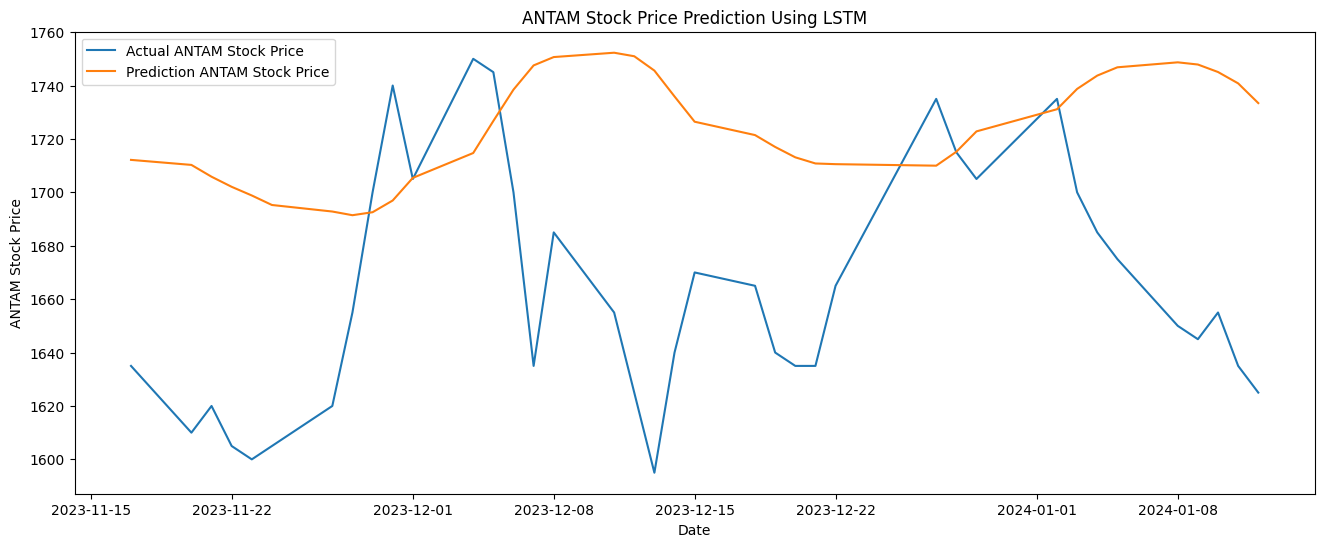

In [65]:
plt.figure(figsize=[16,6])
plt.plot(data.index[-len(predictions):],data[-len(predictions):]['Adj Close'],label="Actual ANTAM Stock Price")
plt.plot(data.index[-len(predictions):],predictions,label="Prediction ANTAM Stock Price")
plt.title("ANTAM Stock Price Prediction Using LSTM")
plt.xlabel("Date")
plt.ylabel("ANTAM Stock Price")
plt.legend()
plt.show()

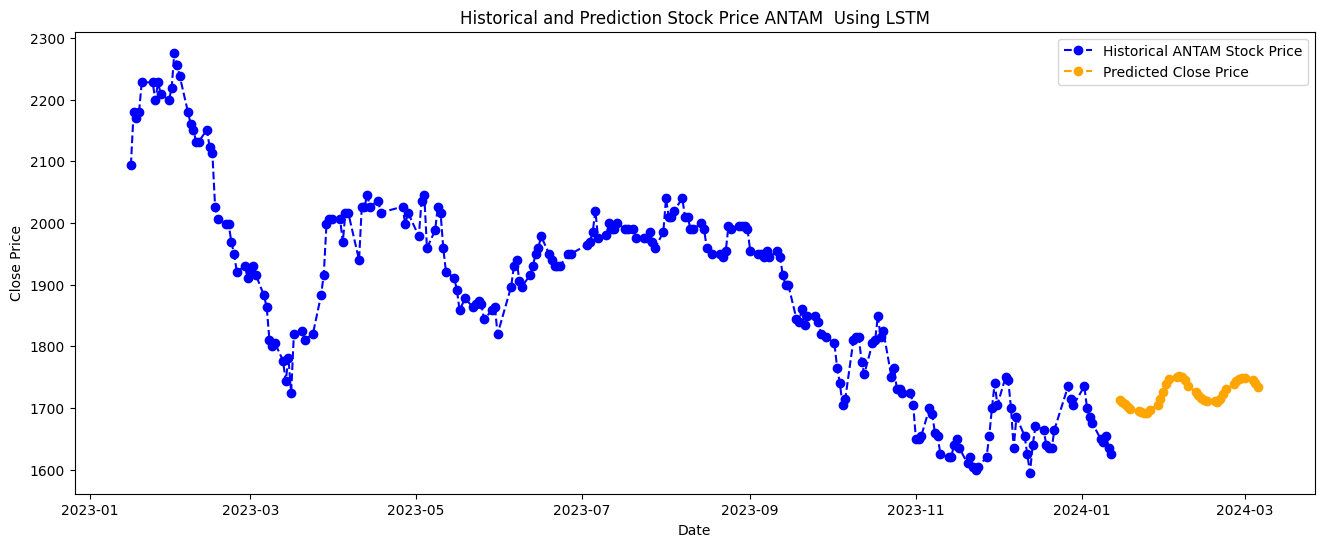

In [68]:
close_price_col ='Adj Close'
plt.figure(figsize=[16,6])
plt.plot(data.index,data[close_price_col],label="Historical ANTAM Stock Price",marker='o',linestyle='--',color='b')

predicted_date=pd.date_range(start=data.index[-1],periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_date,predictions,label="Predicted Close Price",marker='o',linestyle='dashed',color='orange')

plt.title("Historical and Prediction Stock Price ANTAM  Using LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()